In [333]:
import numpy as np
from pytesseract import pytesseract 

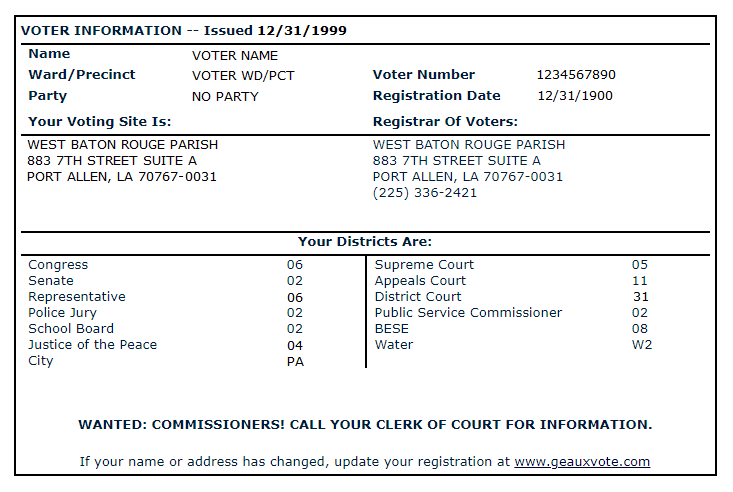

In [334]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("./dataset/Identity Proof/voter information card.png")
image = image.convert("RGB")
image

In [335]:

path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#Define path to image
path_to_image = './dataset/Identity Proof/voter information card.png'

#Point tessaract_cmd to tessaract.exe
pytesseract.tesseract_cmd = path_to_tesseract

#Open image with PIL
img = Image.open(path_to_image)

#Extract text from image
text_from_image = pytesseract.image_to_string(img)

text_from_image

'VOTER INFORMATION -- Issued 12/31/1999\n\nName VOTER NAME\nWard/Precinct VOTER WD/PCT\nParty NO PARTY\n\nYour Voting Site Is:\n\nVoter Number\nRegistration Date\n\n1234567890\n12/31/1900\nRegistrar Of Voter\n\nWEST BATON ROUGE PARISH\n883 7TH STREET SUITE A\nPORT ALLEN, LA 70767-0031\n\nWEST BATON ROUGE PARISH\n883 7TH STREET SUITE A\nPORT ALLEN, LA 70767-0031\n(225) 336-2421\n\n‘Your Districts Are:\n\nCongress\nSenate\n\nRepresentative\nPolice Jury\nSchool Board\n\n06\n02\n06\n02\n02\n04\nPA\n\n‘Supreme Court\nAppeals Court\n\nDistrict Court\n\nPublic Service Commissioner\nBESE\n\nWater\n\n05\niL\na1\n02\nog\nw2\n\nWANTED: COMMISSIONERS! CALL YOUR CLERK OF COURT FOR INFORMATION.\n\nIf your name or address has changed, update your registration at www.geauxvote.com\n\n'

In [336]:
# importing required modules
import PyPDF2

# creating a pdf file object
samplePdf = open('./dataset/bank-statements/Bank Statement.pdf', 'rb')

# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(samplePdf)


# creating a page object
text_from_pdf = pdfReader.getPage(0)
# extracting text from page
pdf_data= text_from_pdf.extractText()




Xref table not zero-indexed. ID numbers for objects will be corrected.


REMOVING STOPWORDS IN IMAGE

In [337]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(text_from_image)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
image_tokens = [w for w in word_tokens if not w.lower() in stop_words]
print(image_tokens)


['VOTER', 'INFORMATION', '--', 'Issued', '12/31/1999', 'Name', 'VOTER', 'NAME', 'Ward/Precinct', 'VOTER', 'WD/PCT', 'Party', 'PARTY', 'Voting', 'Site', ':', 'Voter', 'Number', 'Registration', 'Date', '1234567890', '12/31/1900', 'Registrar', 'Voter', 'WEST', 'BATON', 'ROUGE', 'PARISH', '883', '7TH', 'STREET', 'SUITE', 'PORT', 'ALLEN', ',', 'LA', '70767-0031', 'WEST', 'BATON', 'ROUGE', 'PARISH', '883', '7TH', 'STREET', 'SUITE', 'PORT', 'ALLEN', ',', 'LA', '70767-0031', '(', '225', ')', '336-2421', '‘', 'Districts', ':', 'Congress', 'Senate', 'Representative', 'Police', 'Jury', 'School', 'Board', '06', '02', '06', '02', '02', '04', 'PA', '‘', 'Supreme', 'Court', 'Appeals', 'Court', 'District', 'Court', 'Public', 'Service', 'Commissioner', 'BESE', 'Water', '05', 'iL', 'a1', '02', 'og', 'w2', 'WANTED', ':', 'COMMISSIONERS', '!', 'CALL', 'CLERK', 'COURT', 'INFORMATION', '.', 'name', 'address', 'changed', ',', 'update', 'registration', 'www.geauxvote.com']


In [338]:
feature_names = []
#target will be root directory

In [339]:
import enchant
d = enchant.Dict("en_US")

def isPresent(token):
    digits = "0123456789.-,'()!:;+‘%$#@&^*|"
    present = 0
    for i in range(len(token)):
        if token[i] in digits:
            present = 1
            return True
    return False
 

def final_tokens(token_list):
    res = []
    list = token_list
    for token in list:
        token = str(token)
        if not isPresent(token):
            if d.check(token):
                if token.lower() not in feature_names:
                    feature_names.append(token.lower())

                if token.lower() not in res:
                    res.append(token.lower())

    final__tokens = res

    return final__tokens



In [340]:
final_image_tokens = final_tokens(image_tokens)

print(final_image_tokens)

['voter', 'information', 'issued', 'name', 'party', 'voting', 'site', 'number', 'registration', 'date', 'registrar', 'west', 'baton', 'rouge', 'parish', 'street', 'suite', 'port', 'allen', 'la', 'districts', 'congress', 'senate', 'representative', 'police', 'jury', 'school', 'board', 'pa', 'supreme', 'court', 'appeals', 'district', 'public', 'service', 'commissioner', 'water', 'wanted', 'commissioners', 'call', 'clerk', 'address', 'changed', 'update']


REMOVE STOPWORDS IN TEXT FROM PDF

In [341]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(pdf_data)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
pdf_tokens = [w for w in word_tokens if not w.lower() in stop_words]

print(pdf_tokens)


['1000', 'Walnut', 'Kansas', 'City', 'MO', '64106-3686', 'Jane', 'Customer', '1234', 'Anywhere', 'Dr.', 'Small', 'Town', ',', 'MO', '12345-6789', 'Primary', 'Account', 'Number', ':', '000009752', 'Bank', 'Statement', 'questions', 'statement', ',', 'Statement', 'Date', ':', 'June', '5', ',', '2003', 'please', 'call', 'us', '816-234-2265', 'Page', 'Number', ':', '1', 'CONNECTIONS', 'CHECKING', 'Account', '#', '000009752', 'Account', 'Su', 'mmary', 'Account', '#', '000009752', 'Beginning', 'Balance', 'May', '3', ',', '2003', '$', '7,126.11', 'Deposits', '&', 'Credits', '+3,615.08', 'ATM', 'Withdrawals', '&', 'Debits', '-20.00', 'VISA', 'Check', 'Card', 'Purchases', '&', 'Debits', '-0.00', 'Withdrawals', '&', 'Debits', '-0.00', 'Checks', 'Paid', '-200.00', 'Ending', 'Balance', 'June', '5', ',', '2003', '$', '10,521.19', 'Deposits', '&', 'Credits', 'Account', '#', '000009752', 'Description', 'Date', 'Credited', 'Amount', 'Deposit', 'Ref', 'Nbr', ':', '130012345', '05-15', '$', '3,615.08', '

In [342]:
final_pdf_tokens = final_tokens(pdf_tokens)

print(final_pdf_tokens)

['walnut', 'kansas', 'city', 'mo', 'jane', 'customer', 'anywhere', 'small', 'town', 'primary', 'account', 'number', 'bank', 'statement', 'questions', 'date', 'june', 'please', 'call', 'us', 'page', 'connections', 'checking', 'beginning', 'balance', 'may', 'deposits', 'credits', 'atm', 'withdrawals', 'debits', 'visa', 'check', 'card', 'purchases', 'checks', 'paid', 'ending', 'description', 'credited', 'amount', 'deposit', 'ref', 'total', 'tran', 'withdrawal', 'st']


In [343]:
import os
target_labels = []
path_to_dataset = './dataset/'

In [344]:
for entry in os.scandir(path_to_dataset):
    if entry.is_dir():
        target_labels.append(entry.path[10:])

target_labels

['address proof',
 'bank-statements',
 'business proof',
 'employment proof',
 'fund raising',
 'identity proof',
 'invoices',
 'personal finance statement',
 'power of attorney',
 'receipts',
 'salary slip',
 'tax return']

In [345]:
def readPdf(file_path):
    #pdf input
    inputPdf = open(file_path, 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(inputPdf)
    # creating a page object
    text_from_pdf = pdfReader.getPage(0)
    # extracting text from page
    pdf_data= text_from_pdf.extractText()
    word_tokens = word_tokenize(pdf_data)
    # converts the words in word_tokens to lower case and then checks whether
    #they are present in stop_words or not
    pdf_tokens = [w for w in word_tokens if not w.lower() in stop_words]
    final_pdf_tokens = final_tokens(pdf_tokens)
   

In [346]:
def readImage(image_path):
    #Open image with PIL
    img = Image.open(image_path)

    #Extract text from image
    text_from_image = pytesseract.image_to_string(img)
    word_tokens = word_tokenize(text_from_image)
    # converts the words in word_tokens to lower case and then checks whether
    #they are present in stop_words or not
    image_tokens = [w for w in word_tokens if not w.lower() in stop_words]
    final_image_tokens = final_tokens(image_tokens)

In [347]:
for entry_in_dataset in os.scandir(path_to_dataset):
    for entry_in_file in os.scandir(entry_in_dataset):
        path_to_file = entry_in_file.path.replace('\\', '/')
        # now reading all dataset and adding the unique features into feature names
        if path_to_file[-4:] == '.pdf':
            #pdf input
            readPdf(path_to_file)
        else:
            #image input
            readImage(path_to_file)
 
 
 #feature names ready

Xref table not zero-indexed. ID numbers for objects will be corrected.
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'6' b'0'
Superfluous whitespace found in object header b'5' b'0'
Superfluous whitespace found in object header b'4' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'6' b'0'
Superfluous whitespace found in object header b'5' b'0'
Superfluous whitespace found in object header b'4' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'6' b'0'
Superfluous whitespace found in o

In [348]:
len(feature_names)

3508

In [349]:
feature_names[-1]

'indicator'

In [350]:
import pandas as pd

In [351]:
feature_names.append('target_class')

In [352]:
df2 = pd.DataFrame(columns=feature_names)
df2

,voter,information,issued,name,party,voting,site,number,registration,date,...,senses,racking,numb,blvd,nontaxable,plat,cos,adopt,indicator,target_class


In [353]:
feature_names
len(feature_names)

3509

In [354]:
def readPdf2(file_path):
    #pdf input
    inputPdf = open(file_path, 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(inputPdf)
    # creating a page object
    text_from_pdf = pdfReader.getPage(0)
    # extracting text from page
    pdf_data= text_from_pdf.extractText()
    word_tokens = word_tokenize(pdf_data)
    # converts the words in word_tokens to lower case and then checks whether
    #they are present in stop_words or not
    pdf_tokens = [w for w in word_tokens if not w.lower() in stop_words]
    final_pdf_tokens = final_tokens(pdf_tokens)
    return final_pdf_tokens

def readImage2(image_path):
    #Open image with PIL
    img = Image.open(image_path)

    #Extract text from image
    text_from_image = pytesseract.image_to_string(img)
    word_tokens = word_tokenize(text_from_image)
    # converts the words in word_tokens to lower case and then checks whether
    #they are present in stop_words or not
    image_tokens = [w for w in word_tokens if not w.lower() in stop_words]
    final_image_tokens = final_tokens(image_tokens)
    return final_image_tokens

In [355]:
for entry_in_dataset in os.scandir(path_to_dataset):
    if entry_in_dataset.is_dir():
        className = entry_in_dataset.path[10:]
        print(className)
    for entry_in_file in os.scandir(entry_in_dataset):
        path_to_file = entry_in_file.path.replace('\\', '/')
        # now reading all dataset and adding the unique features into feature names
        if path_to_file[-4:] == '.pdf':
            #pdf input
            final_pdf_tokens = readPdf2(path_to_file)
            row_for_df = [0] * len(feature_names)
            
            for i in range(len(feature_names)-1):
                if feature_names[i] in final_pdf_tokens:
                    row_for_df[i] = 1
            row_for_df[-1] = className
            df2.loc[len(df2.index)] = row_for_df
        else:
            #image input
            final_image_tokens = readImage2(path_to_file)
            row_for_df = [0] * len(feature_names)
            
            for i in range(len(feature_names)-1):
                if feature_names[i] in final_image_tokens:
                    row_for_df[i] = 1
            row_for_df[-1] = className
            df2.loc[len(df2.index)] = row_for_df
 

address proof


Xref table not zero-indexed. ID numbers for objects will be corrected.


bank-statements
business proof
employment proof
fund raising
identity proof
invoices
personal finance statement


Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'6' b'0'
Superfluous whitespace found in object header b'5' b'0'
Superfluous whitespace found in object header b'4' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'6' b'0'
Superfluous whitespace found in object header b'5' b'0'
Superfluous whitespace found in object header b'4' b'0'
Superfluous whitespace found in object header b'1' b'0'
Superfluous whitespace found in object header b'2' b'0'
Superfluous whitespace found in object header b'3' b'0'
Superfluous whitespace found in object header b'6' b'0'
Superfluous whitespace found in object header b'5' b'0'
Superfluous whitespace found in object header b'

power of attorney


Xref table not zero-indexed. ID numbers for objects will be corrected.


receipts
salary slip
tax return


In [356]:
df2.shape

(425, 3509)

YAY !!! DATAFRAME READY

LETS SPLIT AND TRAIN

In [357]:
from sklearn.model_selection import train_test_split
X = df2.drop('target_class', axis='columns')
X

,voter,information,issued,name,party,voting,site,number,registration,date,...,coon,senses,racking,numb,blvd,nontaxable,plat,cos,adopt,indicator
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
422,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [358]:
y = df2['target_class']
y

0      address proof
1      address proof
2      address proof
3      address proof
4      address proof
           ...      
420       tax return
421       tax return
422       tax return
423       tax return
424       tax return
Name: target_class, Length: 425, dtype: object

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [360]:
len(X_train)

318

In [361]:
from sklearn.svm import SVC
svm_classifier = SVC()

In [362]:
svm_classifier.fit(X_train, y_train)
svm_classifier.score(X_test, y_test)

0.8598130841121495

In [363]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
logistic_classifier.score(X_test, y_test)

0.9252336448598131

In [364]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()
decision_classifier.fit(X_train, y_train)
decision_classifier.score(X_test, y_test)

0.9065420560747663

In [365]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(max_depth=2, random_state=0)
random_forest_classifier.fit(X_train, y_train)
random_forest_classifier.score(X_test, y_test)

0.7570093457943925

In [366]:
from sklearn.naive_bayes import MultinomialNB
naiveBayesClassifier = MultinomialNB(alpha=0.1)
naiveBayesClassifier.fit(X_train, y_train)
naiveBayesClassifier.score(X_test, y_test)

0.9065420560747663

In [367]:
d = enchant.Dict("en_US")
def final_tokens2(token_list):
    res = []
    list = token_list
    for token in list:
        token = str(token)
        if not isPresent(token):
            if d.check(token):
                if token.lower() not in res:
                    res.append(token.lower())

    final__tokens = res

    return final__tokens

def readPdf3(file_path):
    #pdf input
    inputPdf = open(file_path, 'rb')

    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(inputPdf)
    # creating a page object
    text_from_pdf = pdfReader.getPage(0)
    # extracting text from page
    pdf_data= text_from_pdf.extractText()
    word_tokens = word_tokenize(pdf_data)
    # converts the words in word_tokens to lower case and then checks whether
    #they are present in stop_words or not
    pdf_tokens = [w for w in word_tokens if not w.lower() in stop_words]
    final_pdf_tokens = final_tokens2(pdf_tokens)
    return final_pdf_tokens

def readImage3(image_path):
    #Open image with PIL
    img = Image.open(image_path)

    #Extract text from image
    text_from_image = pytesseract.image_to_string(img)
    word_tokens = word_tokenize(text_from_image)
    # converts the words in word_tokens to lower case and then checks whether
    #they are present in stop_words or not
    image_tokens = [w for w in word_tokens if not w.lower() in stop_words]
    final_image_tokens = final_tokens2(image_tokens)
    return final_image_tokens

In [394]:
test_tokens = readImage3('./Salary-slip.png')
test_tokens

['company',
 'name',
 'address',
 'pay',
 'slip',
 'employee',
 'total',
 'working',
 'days',
 'id',
 'leaves',
 'designation',
 'paid',
 'department',
 'bank',
 'date',
 'joining',
 'gross',
 'salary',
 'rs',
 'income',
 'earnings',
 'deductions',
 'basic',
 'ep',
 'house',
 'rent',
 'allowances',
 'conveyance',
 'professional',
 'tax',
 'medical',
 'special',
 'net',
 'amount',
 'words',
 'forty',
 'eight',
 'thousand',
 'two',
 'hundred',
 'employer',
 'signature']

In [395]:
row_for_test = []

for i in range(0 ,len(feature_names)-1):
    if feature_names[i] in test_tokens:
        row_for_test.append(1)
    else:
        row_for_test.append(0)
row_for_test

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [396]:
len(row_for_test)

3508

In [397]:
decision_classifier.predict([row_for_test])

c:\Users\Sunpriya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['salary slip'], dtype=object)

In [398]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(decision_classifier, f)

In [ ]:
import json
columns = {
    'feature_names' : [col.lower() for col in X.columns]
}
with open("features.json", "w") as f:
    f.write(json.dumps(columns))